# Manipulación de matrices de datos

Sea $\mathbf{X}\in\mathbb{R}^{N\times D}$ una matriz de $N$ datos $D$-dimensionales. 

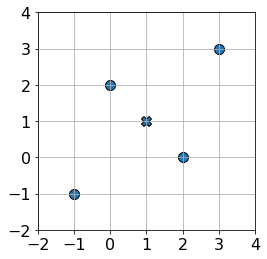

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);

## Suma de trozos de la matriz

**Suma de filas:** $\;\boldsymbol{1}_N^t\mathbf{X}=(\sum\nolimits_n x_{n1},\;\cdots\;,\sum\nolimits_nx_{nD})$

**Media de los datos:** $\;\bar{\boldsymbol{x}}^t=\frac{1}{N}\boldsymbol{1}_N^t\mathbf{X}$

**Suma de columnas:** $\;\mathbf{X}\boldsymbol{1}_D=\begin{pmatrix}\sum_dx_{1d}\\\vdots\\\sum_dx_{Nd}\end{pmatrix}$

**Suma de todas las entradas:** $\;\boldsymbol{1}_N^t\mathbf{X}\boldsymbol{1}_D=\sum\nolimits_{ij}x_{ij}$

**Media global de los datos:** $\;\bar{x}=\frac{1}{ND}\boldsymbol{1}_N^t\mathbf{X}\boldsymbol{1}_D$

In [2]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
print("Suma de filas: ", np.ones(N) @ X, np.sum(X, axis=0))
print("Media de los datos: ", 1/N * np.ones(N) @ X, np.mean(X, axis=0))
print("Suma de columnas: ", X @ np.ones(D), np.sum(X, axis=1))
print("Suma de todas las entradas: ", np.ones(N) @ X @ np.ones(D), np.sum(X))
print("Media global de los datos: ", 1/(N*D) * np.ones(N) @ X @ np.ones(D), np.mean(X))

Suma de filas:  [4. 4.] [4. 4.]
Media de los datos:  [1. 1.] [1. 1.]
Suma de columnas:  [-2.  2.  2.  6.] [-2.  2.  2.  6.]
Suma de todas las entradas:  8.0 8.0
Media global de los datos:  1.0 1.0


## Escalado de filas y columnas de una matriz

**Escalado de filas con $\mathbf{S}=\operatorname{diag}(\boldsymbol{s})$:** $\quad\mathbf{S}\mathbf{X}=\begin{bmatrix}s_1&\cdots&0\\&\ddots&\\0&\cdots&s_N\end{bmatrix}\begin{bmatrix}x_{11}&\cdots&x_{1D}\\&\ddots&\\x_{N1}&\cdots&x_{ND}\end{bmatrix}=\begin{bmatrix}s_1x_{11}&\cdots&s_1x_{1D}\\&\ddots&\\s_Nx_{N1}&\cdots&s_Nx_{ND}\end{bmatrix}$

**Escalado de columnas con $\mathbf{S}=\operatorname{diag}(\boldsymbol{s})$:** $\quad\mathbf{X}\mathbf{S}=\begin{bmatrix}x_{11}&\cdots&x_{1D}\\&\ddots&\\x_{N1}&\cdots&x_{ND}\end{bmatrix}\begin{bmatrix}s_1&\cdots&0\\&\ddots&\\0&\cdots&s_D\end{bmatrix}=\begin{bmatrix}s_1x_{11}&\cdots&s_Dx_{1D}\\&\ddots&\\s_1x_{N1}&\cdots&s_Dx_{ND}\end{bmatrix}$

**Estandarización:** $\quad\operatorname{standardize}(\mathbf{X})=(\mathbf{X}-\boldsymbol{1}_N\boldsymbol{\mu}^t)\operatorname{diag}(\boldsymbol{\sigma})^{-1}$


Sigma:  [1.58113883 1.58113883]


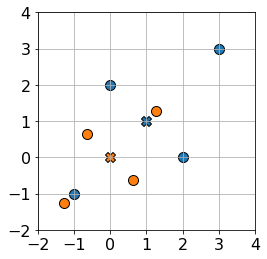

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
sigma = np.std(X, axis=0)
print("Sigma: ", sigma)
Xstd = (X - np.mean(X, axis=0)) / sigma
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);
plt.scatter(0, 0, facecolor='C1', edgecolor='k', s=100, marker="X")
plt.scatter(Xstd[:,0], Xstd[:,1], facecolor='C1', edgecolor='k', s=100);

## Suma de cuadrados y matriz de dispersión

**Suma de cuadrados:** $\;\displaystyle\mathbf{S}_0=\mathbf{X}^t\mathbf{X}=[\boldsymbol{x}_1,\boldsymbol{x}_2,\dotsc,\boldsymbol{x}_N]\begin{bmatrix}\boldsymbol{x}_1^t\\\boldsymbol{x}_2^t\\\vdots\\\boldsymbol{x}_N^t\end{bmatrix}=\sum_{n=1}^N\boldsymbol{x}_n\boldsymbol{x}_n^t=\sum_{n=1}^N\begin{pmatrix}x_{n1}^2&\cdots&x_{n1}x_{nD}\\&\ddots\\x_{nD}x_{n1}&\cdots&x_{nD}^2\end{pmatrix}$

**Matriz de centrado:** $\;\mathbf{C}_N=\mathbf{I}_N-\frac{1}{N}\boldsymbol{1}_N\boldsymbol{1}_N^t,\,$ simétrica e idempotente ($\mathbf{C}_N^k=\mathbf{C}_N$, $k\geq 1$), centra los datos
$$\tilde{\mathbf{X}}=\mathbf{X}-\boldsymbol{1}_N\bar{\boldsymbol{x}}^t=\mathbf{X}-\frac{1}{N}\boldsymbol{1}_N\boldsymbol{1}_N^t\mathbf{X}=\mathbf{C}_N\mathbf{X}$$

**Matriz de dispersión:** $\;\displaystyle\mathbf{S}_{\bar{\boldsymbol{x}}}=\sum_{n=1}^N(\boldsymbol{x}_n-\bar{\boldsymbol{x}})(\boldsymbol{x}_n-\bar{\boldsymbol{x}})^t=\tilde{\mathbf{X}}^t\tilde{\mathbf{X}}=\mathbf{X}^t\mathbf{C}_N^t\mathbf{C}_N\mathbf{X}=\mathbf{X}^t\mathbf{C}_N\mathbf{X}$

In [4]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
print("Suma de cuadrados:\n", X.T @ X)
C = np.eye(N) - np.ones((N, N))/N; print("Matriz de centrado:\n", C)
print("Matriz de dispersión:\n", X.T @ C @ X, "\n", N * np.cov(X, rowvar=False, bias=True))

Suma de cuadrados:
 [[14. 10.]
 [10. 14.]]
Matriz de centrado:
 [[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]
Matriz de dispersión:
 [[10.  6.]
 [ 6. 10.]] 
 [[10.  6.]
 [ 6. 10.]]


## Matriz de Gram

**Matriz de Gram:** $\;\mathbf{K}=\mathbf{X}\mathbf{X}^t=\begin{bmatrix}\boldsymbol{x}_1^t\boldsymbol{x}_1&\cdots&\boldsymbol{x}_1^t\boldsymbol{x}_N\\&\vdots\\\boldsymbol{x}_N^t\boldsymbol{x}_1 &\cdots&\boldsymbol{x}_N^t\boldsymbol{x}_N\end{bmatrix}\quad$ (matriz de productos escalares)

**Gram para datos centrados a partir de Gram:** $\quad$ **truco del doble centrado**
$$\tilde{\mathbf{K}}=\tilde{\mathbf{X}}\tilde{\mathbf{X}}^t=\mathbf{C}_N\mathbf{X}(\mathbf{C}_N\mathbf{X})^t=\mathbf{C}_N\mathbf{K}\mathbf{C}_N$$ 

In [5]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float); N, D = X.shape
K = X @ X.T; print("Gram:\n", K)
Xc = X - np.mean(X, axis=0)
Kc = Xc @ Xc.T; print("Gram centrados:\n", Kc)
C = np.eye(N) - np.ones((N, N))/N
Kc_K = C @ K @ C; print("Gram centrados con truco:\n", Kc_K)

Gram:
 [[ 2. -2. -2. -6.]
 [-2.  4.  0.  6.]
 [-2.  0.  4.  6.]
 [-6.  6.  6. 18.]]
Gram centrados:
 [[ 8.  0.  0. -8.]
 [ 0.  2. -2.  0.]
 [ 0. -2.  2.  0.]
 [-8.  0.  0.  8.]]
Gram centrados con truco:
 [[ 8.  0.  0. -8.]
 [ 0.  2. -2.  0.]
 [ 0. -2.  2.  0.]
 [-8.  0.  0.  8.]]


## Matriz de distancias

**Distancia (Euclídea) al cuadrado entre $\,\boldsymbol{x}, \boldsymbol{y}\in\mathbb{R}^D$:** $\quad \lVert\boldsymbol{x}-\boldsymbol{y}\rVert_2^2=(\boldsymbol{x}-\boldsymbol{y})^t(\boldsymbol{x}-\boldsymbol{y})=\lVert\boldsymbol{x}\rVert_2^2-2\boldsymbol{x}^t\boldsymbol{y}+\lVert\boldsymbol{y}\rVert_2^2$

**Extensión a matrices de datos, $\mathbf{X}\in\mathbb{R}^{N\times D},\,\mathbf{Y}\in\mathbb{R}^{M\times D}$:** $\quad\mathbf{D}\in\mathbb{R}^{N\times M}$
$$\mathbf{D}=\operatorname{diag}(\mathbf{X}\mathbf{X}^t)\boldsymbol{1}_M^t-2\mathbf{X}\mathbf{Y}^t+\boldsymbol{1}_N\operatorname{diag}(\mathbf{Y}\mathbf{Y}^t)^t$$

**Caso $\mathbf{Y}=\mathbf{X}$:**$\qquad\mathbf{D}=\mathbf{H}-2\mathbf{K}+\mathbf{H}^t\quad$ con $\quad\mathbf{H}=\operatorname{diag}(\mathbf{K})\boldsymbol{1}_N^t\;$ y $\;\mathbf{K}=\mathbf{X}\mathbf{X}^t\;$ (Gram)

In [6]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
K = X @ X.T; H = np.diag(K).reshape(-1, 1); print(H - 2*K + H.T)

[[ 0. 10. 10. 32.]
 [10.  0.  8. 10.]
 [10.  8.  0. 10.]
 [32. 10. 10.  0.]]


In [7]:
import numpy as np
import scipy.spatial.distance as dist
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
V = dist.pdist(X, 'sqeuclidean')
print(V, "\n", dist.squareform(V))

[10. 10. 32.  8. 10. 10.] 
 [[ 0. 10. 10. 32.]
 [10.  0.  8. 10.]
 [10.  8.  0. 10.]
 [32. 10. 10.  0.]]
